In [1]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

!wget https://zenodo.org/record/3578468/files/annotated_brenda.tsv

In [27]:
def load_domain_ogt():
    df = pd.read_csv('annotated_brenda.tsv',sep='\t',index_col=0)
    data = dict()
    for ind in df.index:
        org = df.loc[ind,'organism']
        ogt = df.loc[ind,'ogt']
        dom = df.loc[ind,'domain']
        
        data[org] = [dom,ogt]
    
    dforg = pd.DataFrame()
    orgs = list(data.keys())
    dforg['domain'] = [data[org][0] for org in orgs]
    dforg['ogt'] = [data[org][1] for org in orgs]
    return df,dforg

In [28]:
df,dforg = load_domain_ogt()

In [29]:
df.head(5)

,ec,uniprot_id,domain,organism,ogt,ogt_note,topt,topt_note
0,1.1.1.1,Q8TZM9,Archaea,pyrococcus_furiosus,96.0,experimental,85.751875,predicted
1,1.1.1.1,H6Q9G7,Archaea,pyrobaculum_oguniense,90.0,experimental,76.366500,predicted
2,1.1.1.1,H6QDS7,Archaea,pyrobaculum_oguniense,90.0,experimental,83.718500,predicted
3,1.1.1.1,H6Q7F2,Archaea,pyrobaculum_oguniense,90.0,experimental,80.064000,predicted
4,1.1.1.1,H6QB36,Archaea,pyrobaculum_oguniense,90.0,experimental,83.540500,predicted


In [30]:
dforg.head(5)

,domain,ogt
0,Archaea,96.0
1,Archaea,90.0
2,Archaea,90.0
3,Archaea,90.0
4,Archaea,90.0


In [46]:
df.shape

(6507076, 8)

In [31]:
dforg.shape

(9515, 2)

/apps/Vera/software/MPI/GCC-CUDA/6.4.0-2.28-9.1.85/OpenMPI/2.1.2/Python/3.6.7/lib/python3.6/site-packages/scipy-1.1.0-py3.6-linux-x86_64.egg/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


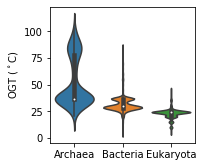

In [51]:
plt.figure(figsize=(2.6,2.5))
sns.violinplot(x='domain',y='ogt',data=dforg,scale='width')
plt.xlabel(None)
plt.ylabel('OGT ($^\circ$C)')
plt.savefig('../results/figures/org_ogt_domain.pdf',bbox_inches='tight')

/apps/Vera/software/MPI/GCC-CUDA/6.4.0-2.28-9.1.85/OpenMPI/2.1.2/Python/3.6.7/lib/python3.6/site-packages/scipy-1.1.0-py3.6-linux-x86_64.egg/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


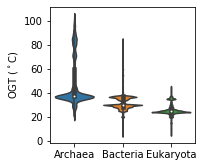

In [52]:
plt.figure(figsize=(2.6,2.5))
sns.violinplot(x='domain',y='ogt',data=df,scale='width')
plt.xlabel(None)
plt.ylabel('OGT ($^\circ$C)')
plt.savefig('../results/figures/enzyme_ogt_domain.pdf',bbox_inches='tight')

### Visualize the source of cleaned enzyme sequences

In [13]:
def load_seq_dom():
    #df = pd.read_csv('annotated_brenda.tsv',sep='\t',index_col=0)
    seq_org = {}
    org_ogt = {}
    org_dom = {}
    for line in open('annotated_brenda.tsv'): 
        try:
            lst = line.split('\t')
            org_ogt[lst[4]] = float(lst[5])
            seq_org[lst[2]] = lst[4]
            org_dom[lst[4]] = lst[3]
        except: pass
    print('unique seqs:',len(seq_org))
    print('unique org:',len(org_dom),len(org_ogt))
    return seq_org,org_ogt,org_dom

In [9]:
!head annotated_brenda.tsv

	ec	uniprot_id	domain	organism	ogt	ogt_note	topt	topt_note
0	1.1.1.1	Q8TZM9	Archaea	pyrococcus_furiosus	96.0	experimental	85.751875	predicted
1	1.1.1.1	H6Q9G7	Archaea	pyrobaculum_oguniense	90.0	experimental	76.3665	predicted
2	1.1.1.1	H6QDS7	Archaea	pyrobaculum_oguniense	90.0	experimental	83.7185	predicted
3	1.1.1.1	H6Q7F2	Archaea	pyrobaculum_oguniense	90.0	experimental	80.064	predicted
4	1.1.1.1	H6QB36	Archaea	pyrobaculum_oguniense	90.0	experimental	83.5405	predicted
5	1.1.1.1	H6QC08	Archaea	pyrobaculum_oguniense	90.0	experimental	80.3105	predicted
6	1.1.1.1	A3MVR8	Archaea	pyrobaculum_calidifontis	90.0	experimental	82.007	predicted
7	1.1.1.1	A8A8R4	Archaea	ignicoccus_hospitalis	90.0	experimental	85.1715	predicted
8	1.1.1.1	Q9Y9P9	Archaea	aeropyrum_pernix	90.0	experimental	81.988	predicted


In [24]:
def plot_dom_dist_of_cleaned_seqs(seq_org,org_ogt,org_dom,clean_seq_ids):
    df = pd.DataFrame()
    
    orgs = {seq_org[seq]:0 for seq in clean_seq_ids}
    print(len(orgs))
    doms = dict()
    for org in orgs.keys(): 
        doms[org_dom[org]] = doms.get(org_dom[org],0) + 1
    print(doms)
    
    dom_seqs = {}
    for seq in clean_seq_ids:
        dom = org_dom[seq_org[seq]]
        dom_seqs[dom] = dom_seqs.get(dom,0) +1
    print(dom_seqs)
        
    
    
    df['domain'] = [org_dom[seq_org[seq]] for seq in clean_seq_ids]
    df['ogt'] = [org_ogt[seq_org[seq]] for seq in clean_seq_ids]
    
    print(df.shape)
    plt.figure(figsize=(3,2.5))
    sns.violinplot(y='domain',x='ogt',data=df,scale='width')
    plt.ylabel(None)
    plt.xlabel('OGT ($^\circ$C)')
    plt.savefig('../results/figures/enzyme_ogt_domain_cleaned.pdf',bbox_inches='tight')

In [14]:
seq_org,org_ogt,org_dom = load_seq_dom()
clean_seq_ids = [line[1:].split()[0] for line in open('../data/ogt/cleaned_ogts.fasta') if line.startswith('>')]

unique seqs: 6270107
unique org: 9515 9515


8184
{'Bacteria': 6378, 'Eukaryota': 1492, 'Archaea': 314}
{'Bacteria': 2747222, 'Eukaryota': 184257, 'Archaea': 84026}
(3015505, 2)


/apps/Vera/software/MPI/GCC-CUDA/6.4.0-2.28-9.1.85/OpenMPI/2.1.2/Python/3.6.7/lib/python3.6/site-packages/scipy-1.1.0-py3.6-linux-x86_64.egg/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


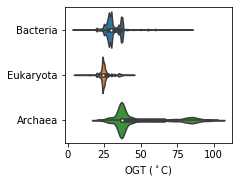

In [25]:
plot_dom_dist_of_cleaned_seqs(seq_org,org_ogt,org_dom,clean_seq_ids)